In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import Formatter    # to convert xaxis label to dates
from datetime import datetime, timedelta
import pytz
import pandas as pd
import datetime
from datetime import date
import time
import numpy as np


from lz_ignition_dbi.lz_ignition_dbi import IDBIWrapper
import lz_ignition_dbi.lz_ignition_bindata as bindata

#starting from here:
#https://gitlab.com/luxzeplin/sharing/slowcontrolanalysis/-/blob/main/DetectorStatusChecks.ipynb

In [15]:
tags  = ['5505OHM', '5502DO', 'S1ODROW1', 'S1ODROW2', 'S1ODROW3', 'S1ODROW4', 'S1ODROW5', 'S1ODROW6']
label = ['[MOhm/cm]', '[ppb]']
color = ['b', 'r']

df=pd.DataFrame(list(zip(tags, label, color)),
              columns=['tags','label', 'color'])

days_past=60


In [16]:
axis_type = 'dateLabel' 
TIMEZONE = 'US/Mountain'
DATEFORMAT = '%Y-%-m-%-dT%H:%M'  # see https://strftime.org/

class DateFormat(Formatter):
    """
    This class converts the seconds since unix epoch to date strings
    """
    def __init__(self, format=None, timezone=None):
        self.format = format if format is not None else '%Y-%m-%dT%H:%M'
        self.timezone = timezone if timezone is not None else 'US/Mountain'

    def __call__(self, x, pos=None):
        tz = pytz.timezone(TIMEZONE)
        newticklabel = datetime.datetime.fromtimestamp(x).astimezone(tz).strftime(self.format)
        return newticklabel

dateformatter = DateFormat(DATEFORMAT, TIMEZONE)


In [17]:
# Retrieve the slow control data from the Ignition DB, '2021-12-23T09:30:00' start of SR1

end = datetime.datetime.fromtimestamp(time.time()) # Get today's date
start = end - datetime.timedelta(days=days_past)           # Get date from a week ago
print(start)
print(end)
end = end.isoformat()                              # Convert to correct format
start = start.isoformat()
start='2022-12-12 00:00:00'


#SR1: Dec 23 2021 - April 18 2022
start2='2022-01-1 04:15:59' #no isoformat needed
end2='2022-04-18 04:15:59'

idbi = IDBIWrapper(known_tags_file='/global/u2/p/penning/work/od_ignition_mon/bp_tag_map_PMTs.json')
idbi.select(tags, start, end)
data = idbi.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data[t]['times'] = [ x/1000. for x in data[t]['times'] ]  



2022-12-11 09:15:25.992502
2023-02-09 09:15:25.992502


In [1]:
#need general figure object for things to work later
fig = plt.figure()
def plotIgnition(fname,ylabel,ax=None,options='', ylim=[]):
    if ax is None:
        ax = plt.gca()
    # Make the plot
    ax.plot(data[fname]['times'], data[fname]['vals'], options, label=fname)
    #ax.plot(data_sr1[fname]['times'], data_sr1[fname]['vals'], options, label=fname)
    plt.title(fname)
    plt.ylabel(ylabel)
    if ylim:
        ax.set_ylim(ylim)
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    # Rotate the tick labels and align them to the right
    for tick in ax.xaxis.get_majorticklabels():
        tick.set_horizontalalignment('right')
        tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    return ax

NameError: name 'plt' is not defined

In [19]:
start2='2022-01-30 04:15:59'
end2='2022-04-02 04:15:59'

idbi2 = IDBIWrapper(known_tags_file='/global/u2/p/penning/work/od_ignition_mon/bp_tag_map_PMTs.json')
idbi2.select(tags, start2, end2)
data2 = idbi2.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data2[t]['times'] = [ x/1000. for x in data2[t]['times'] ]  



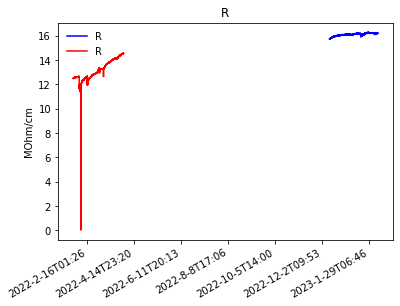

In [20]:
fig = plt.figure()
ax = plt.gca()
ax.plot(data['5505OHM']['times'], data['5505OHM']['vals'], 'b', label='R')
ax.plot(data2['5505OHM']['times'], data2['5505OHM']['vals'], 'r', label='R')
plt.title('R')
plt.ylabel('MOhm/cm')
ax.legend(frameon=False)
ax.xaxis.set_major_formatter(dateformatter)
# Rotate the tick labels and align them to the right
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment('right')
    tick.set_rotation(30)
   

In [21]:
fig = plt.figure()
def plotIgnition(dataf, fname,ylabel,ax=None,options='', ylim=None):
    if ax is None:
        ax = plt.gca()
    # Make the plot
    if '5505OHM' in fname:
        ax.set_ylim(11.,16.5)
    if '5502DO' in fname:
        ax.set_ylim(0,15)
    if 'S1ODROW6' in fname:
        ax.set_ylim(30000,100000)
    ax.plot(dataf[fname]['times'], dataf[fname]['vals'], options, label=fname)
    plt.ylabel(ylabel)
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    # Rotate the tick labels and align them to the right
    for tick in ax.xaxis.get_majorticklabels():
        tick.set_horizontalalignment('right')
        tick.set_rotation(20)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    return ax

<Figure size 432x288 with 0 Axes>

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,10), dpi=120)
plotIgnition(data2,'5505OHM', 'Resistivity [MOhm/cm]', ax1, 'b', '12, 16.5')
plotIgnition(data,'5505OHM', 'Resistivity [MOhm/cm]', ax2, 'r', '12, 16.5')


<AxesSubplot:ylabel='Resistivity [MOhm/cm]'>

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,10), dpi=120)
plotIgnition(data2,'5502DO', 'DO2 [ppb]', ax1, 'b')
plotIgnition(data,'5502DO', 'DO2 [ppb]', ax2, 'r')

<AxesSubplot:ylabel='DO2 [ppb]'>

In [24]:
#plot rats individually and together plots
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex=True, figsize=(12,35), dpi=120)
plotIgnition(data2, 'S1ODROW1', 'S1ODROW1', ax1,  'steelblue')
plotIgnition(data2, 'S1ODROW2', 'S1ODROW2', ax1,  'lightslategrey')
plotIgnition(data2, 'S1ODROW3', 'S1ODROW3', ax1,  'slateblue')
plotIgnition(data2, 'S1ODROW4', 'S1ODROW4', ax1,  'darkslateblue')
plotIgnition(data2, 'S1ODROW5', 'S1ODROW5', ax1,  'midnightblue')
plotIgnition(data2, 'S1ODROW6', 'S1ODROW6', ax1,  'lightblue')
plotIgnition(data2, 'S1ODROW1', 'S1ODROW1', ax2,  'steelblue')
plotIgnition(data2, 'S1ODROW2', 'S1ODROW2', ax3,  'lightslategrey')
plotIgnition(data2, 'S1ODROW3', 'S1ODROW3', ax4,  'slateblue')
plotIgnition(data2, 'S1ODROW4', 'S1ODROW4', ax5,  'darkslateblue')
plotIgnition(data2, 'S1ODROW5', 'S1ODROW5', ax6,  'midnightblue')
plotIgnition(data2, 'S1ODROW6', 'S1ODROW6', ax7,  'lightblue')
#f.savefig('rates_monitor.png')

<AxesSubplot:ylabel='S1ODROW6'>

In [25]:
#plot rats individually and together plots
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex=True, figsize=(12,35), dpi=120)
plotIgnition(data, 'S1ODROW1', 'S1ODROW1', ax1,  'steelblue')
plotIgnition(data, 'S1ODROW2', 'S1ODROW2', ax1,  'lightslategrey')
plotIgnition(data, 'S1ODROW3', 'S1ODROW3', ax1,  'slateblue')
plotIgnition(data, 'S1ODROW4', 'S1ODROW4', ax1,  'darkslateblue')
plotIgnition(data, 'S1ODROW5', 'S1ODROW5', ax1,  'midnightblue')
plotIgnition(data, 'S1ODROW6', 'S1ODROW6', ax1,  'lightblue')
plotIgnition(data, 'S1ODROW1', 'S1ODROW1', ax2,  'steelblue')
plotIgnition(data, 'S1ODROW2', 'S1ODROW2', ax3,  'lightslategrey')
plotIgnition(data, 'S1ODROW3', 'S1ODROW3', ax4,  'slateblue')
plotIgnition(data, 'S1ODROW4', 'S1ODROW4', ax5,  'darkslateblue')
plotIgnition(data, 'S1ODROW5', 'S1ODROW5', ax6,  'midnightblue')
plotIgnition(data, 'S1ODROW6', 'S1ODROW6', ax7,  'lightblue')
#f.savefig('rates_monitor.png')

<AxesSubplot:ylabel='S1ODROW6'>

<AxesSubplot:ylabel='S1ODROW6'>

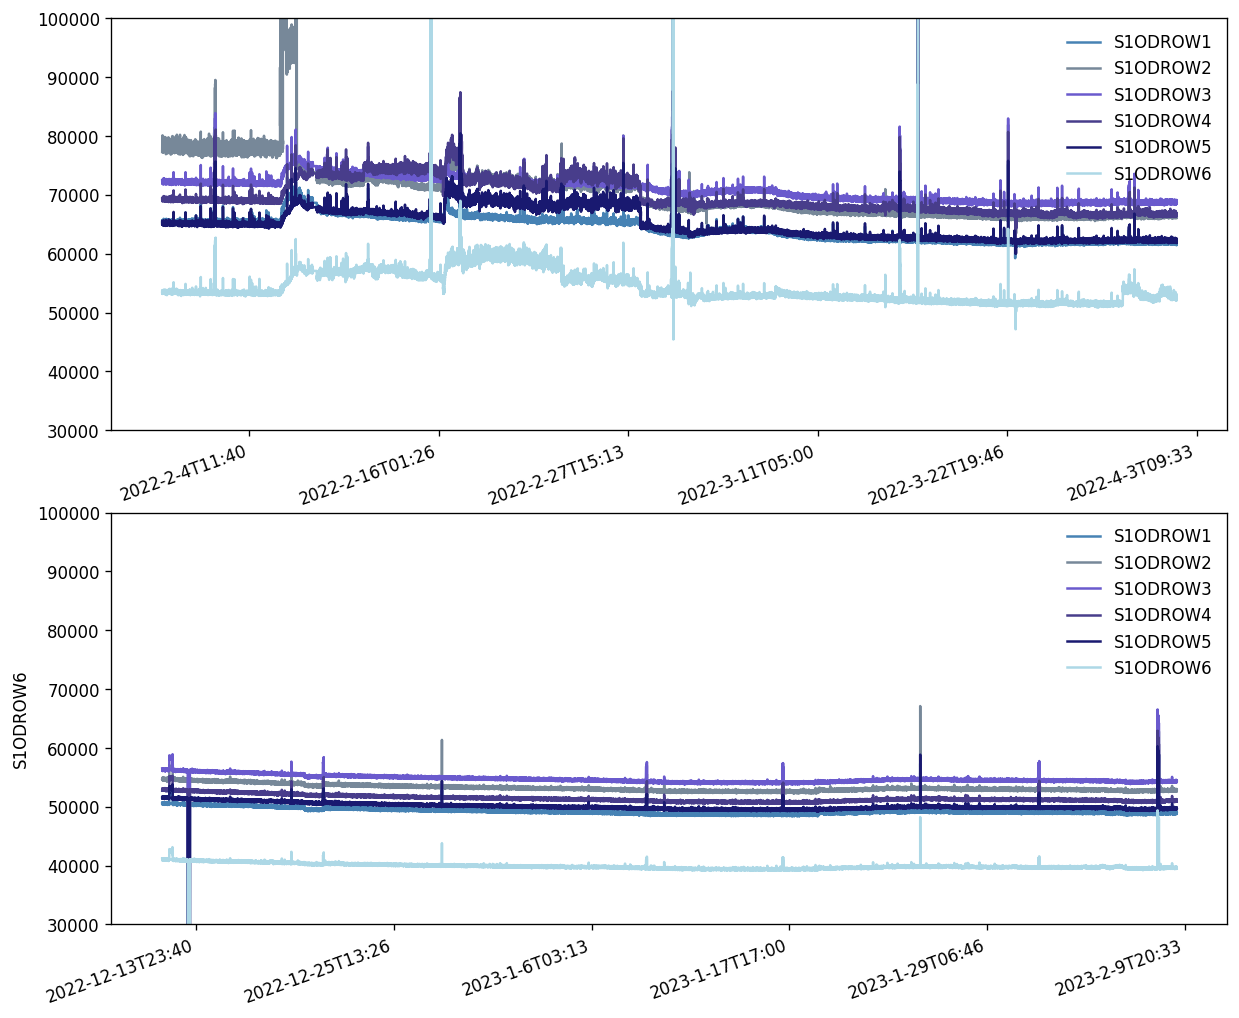

In [26]:
#plot rats individually and together plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,10), dpi=120)
plotIgnition(data2, 'S1ODROW1', 'S1ODROW1', ax1,  'steelblue')
plotIgnition(data2, 'S1ODROW2', 'S1ODROW2', ax1,  'lightslategrey')
plotIgnition(data2, 'S1ODROW3', 'S1ODROW3', ax1,  'slateblue')
plotIgnition(data2, 'S1ODROW4', 'S1ODROW4', ax1,  'darkslateblue')
plotIgnition(data2, 'S1ODROW5', 'S1ODROW5', ax1,  'midnightblue')
plotIgnition(data2, 'S1ODROW6', 'S1ODROW6', ax1,  'lightblue')
plotIgnition(data, 'S1ODROW1', 'S1ODROW1', ax2,  'steelblue')
plotIgnition(data, 'S1ODROW2', 'S1ODROW2', ax2,  'lightslategrey')
plotIgnition(data, 'S1ODROW3', 'S1ODROW3', ax2,  'slateblue')
plotIgnition(data, 'S1ODROW4', 'S1ODROW4', ax2,  'darkslateblue')
plotIgnition(data, 'S1ODROW5', 'S1ODROW5', ax2,  'midnightblue')
plotIgnition(data, 'S1ODROW6', 'S1ODROW6', ax2,  'lightblue')
#f.savefig('rates_monitor.png')